In [1]:
suppressPackageStartupMessages(library(Rsamtools))
suppressPackageStartupMessages(library(GenomicFeatures))
suppressPackageStartupMessages(library(mixOmics))
suppressPackageStartupMessages(library(gplots))
suppressPackageStartupMessages(library(ggplot2))
suppressPackageStartupMessages(library(Mus.musculus))
suppressPackageStartupMessages(library(edgeR))
suppressPackageStartupMessages(library(GenomicAlignments))

In [2]:
y.keep <- readRDS('y.keep.disp.rds')

In [3]:
design <- model.matrix(~ 0 + y.keep$samples$Diet)
colnames(design) <- levels(y.keep$samples$Diet)

In [4]:
y.keep.disp <- estimateDisp(y.keep, design, robust=TRUE)

In [5]:
logCPM <- cpm(y.keep.disp, prior.count=2, log=TRUE)
colnames(logCPM) <- rownames(y.keep.disp$samples)

In [6]:
fit <- glmQLFit(y.keep.disp, design, robust=TRUE)
con <- makeContrasts(TXN - HFD, levels=design)
qlf <- glmQLFTest(fit, contrast=con)
o <- order(qlf$table$PValue)
length(o)

[1] 1564

In [7]:
all <- logCPM[o[1:200],]
all <- t(scale(t(all)))

In [8]:
#col.pan <- colorpanel(100, "green", "white", "red")
col.grp <- c("grey", "grey", "grey", "grey", "grey", "grey", "grey", "grey", "grey", "grey", 
    "#0080ff", "#0080ff", "#0080ff", "#0080ff", "#0080ff", "#0080ff", "#0080ff", "#0080ff", "#0080ff", "#0080ff", 
    "red",  "red", "red", "red", "red", "red", "red", "red", "red", "red", 
    "darkgreen",  "darkgreen", "darkgreen", "darkgreen", "darkgreen", "darkgreen", "darkgreen", "darkgreen", "darkgreen")
cond.col <- c("LFD" = "grey", "HFD" = "#0080ff", "HXN" = "red", "TXN" = "darkgreen")

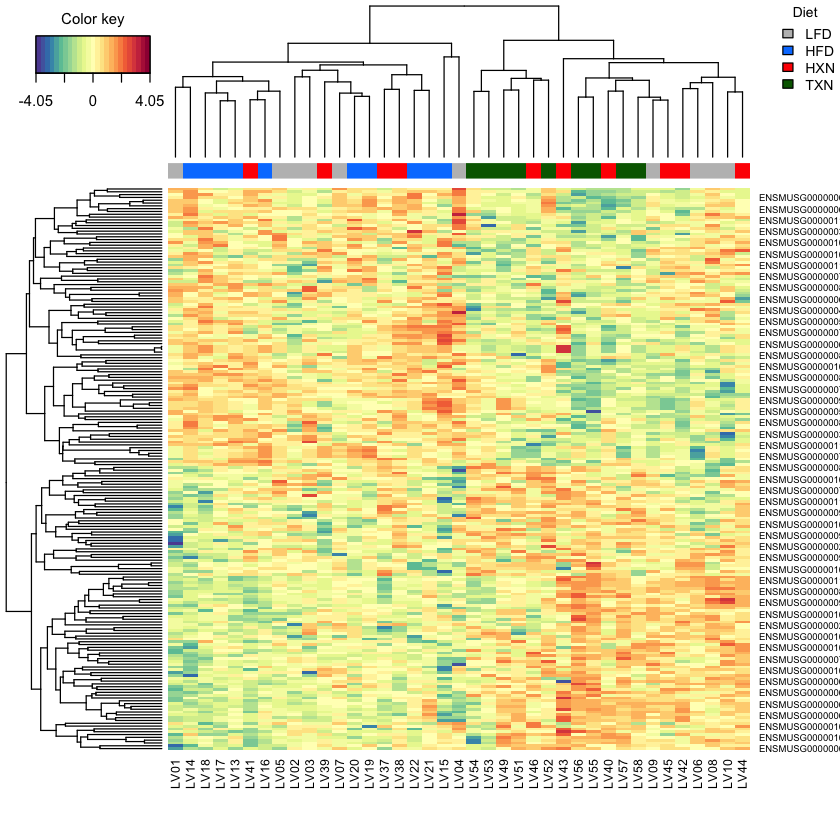

In [9]:
obj.cim=cim(all, cluster = 'both', col.sideColors=col.grp, 
            dist.method = c("euclidean", "euclidean"),
            clust.method = c("complete", "complete"),
           legend=list( legend = unique(y.keep.disp$samples$group), col = cond.col, title = "Diet", cex = 0.7))

In [10]:
pdf("newheatmap_all.pdf", width = 12, height = 14)
obj.cim=cim(all, cluster = 'both', keysize=c(0.8,0.4),
            col.sideColors=col.grp, col.names=FALSE, row.cex=0.4,
            dist.method = c("euclidean", "euclidean"),
            clust.method = c("complete", "complete"),
            legend=list(legend = unique(y.keep.disp$samples$group), 
                       col = cond.col, title = "Diet", cex = 0.9))
dev.off()

pdf 
  2

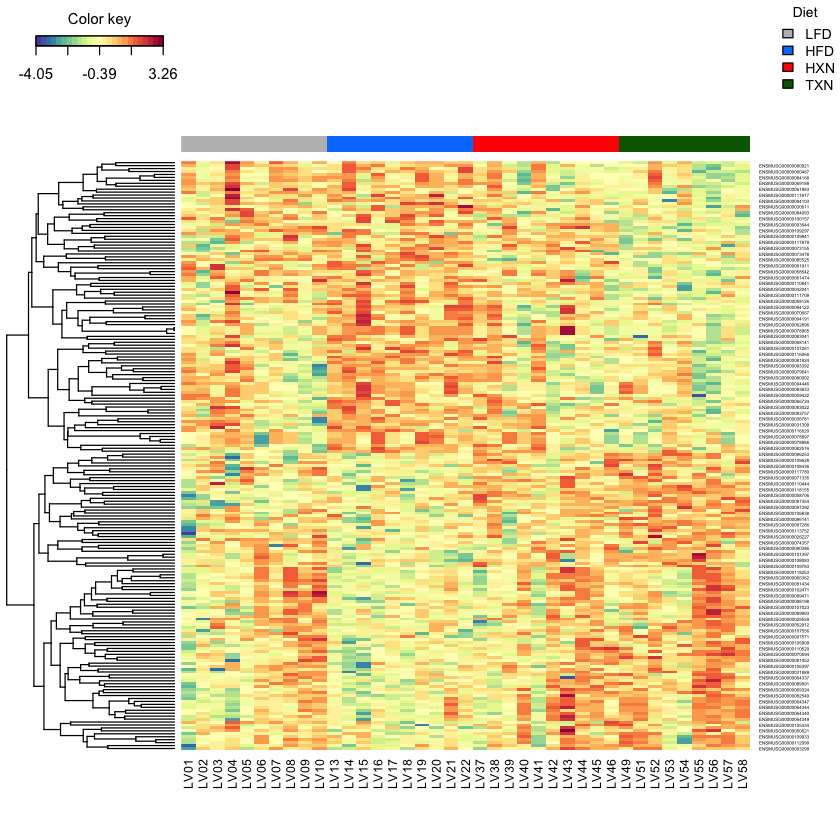

In [13]:
#pdf("heatmap_all.pdf")
fig <- cim(all, col.names=TRUE, 
    cluster = "row", symkey=FALSE, keysize=c(1.1,0.8),
    row.cex=0.3, col.sideColors=col.grp, dist.method = c("euclidean", "euclidean"),
clust.method = c("complete", "complete"),
    legend=list( legend = unique(y.keep.disp$samples$group), col = cond.col, title = "Diet", cex = 0.7),
    #title="Top 60 \nDifferential Expressed Genes in the Liver"
   )
#dev.off()

In [88]:
set <- logCPM[o[1:60],]
set <- t(scale(t(set)))

In [99]:
pdf("heatmap_top100_txn_hfd.pdf")
cim(set, color=col.pan, col.names=TRUE, 
    cluster = "row", symkey=FALSE, keysize=c(1.1,0.8),
    row.cex=0.4, col.sideColors=col.grp,
    legend=list( legend = unique(y.keep.disp$samples$group), col = cond.col, title = "Diet", cex = 0.7),
    #title="Top 60 \nDifferential Expressed Genes in the Liver"
   )
dev.off()

pdf 
  2

In [11]:

con2 <- makeContrasts(HXN - HFD, levels=design)
con3 <- makeContrasts(LFD - HFD, levels=design)

stat_txnHFD_qlf <- topTags(qlf, n=nrow(y.keep.disp))$table
qlf2 <- glmQLFTest(fit, contrast=con2)
stat_hxnHFD_qlf <- topTags(qlf2, n=nrow(y.keep.disp))$table
qlf3 <- glmQLFTest(fit, contrast=con3)
stat_lfdHFD_qlf <- topTags(qlf3, n=nrow(y.keep.disp))$table

In [54]:
pdf("volplot-txn-hfd.pdf")
par(mar = c(5, 5, 4.5, 1))
volcanoData <- cbind(stat_txnHFD_qlf$logFC, -log10(stat_txnHFD_qlf$FDR))
colnames(volcanoData) <- c("logFC", "-Log10FDR")
DEGs <- stat_txnHFD_qlf$FDR < 0.4
point.col <- ifelse(DEGs, "red", "black")
sign.genes=which(stat_txnHFD_qlf$FDR<0.4)
plot(volcanoData, pch=16, col = point.col, cex = 1, main=paste("TXN vs. HFD", "\nNumber of DEGs: ", table(DEGs)[2]),
    cex.main=2, cex.lab=2, cex.axis=1.2)
text(x=stat_txnHFD_qlf$logFC[sign.genes] , y=-log10(stat_txnHFD_qlf$FDR[sign.genes]), 
    label=NULL)

dev.off()

pdf 
  2

In [25]:
jpeg("volplot-txn-hfd.jpeg")
par(mar = c(5, 5, 4.5, 1))
volcanoData <- cbind(stat_txnHFD_qlf$logFC, -log10(stat_txnHFD_qlf$FDR))
colnames(volcanoData) <- c("logFC", "-Log10FDR")
DEGs <- stat_txnHFD_qlf$FDR < 0.4
point.col <- ifelse(DEGs, "red", "black")
sign.genes=which(stat_txnHFD_qlf$FDR<0.4)
plot(volcanoData, pch=16, col = point.col, cex = 1, main=paste("TXN vs. HFD", "\nNumber of DEGs: ", table(DEGs)[2]),
    cex.main=2, cex.lab=2, cex.axis=1.2)
text(x=stat_txnHFD_qlf$logFC[sign.genes] , y=-log10(stat_txnHFD_qlf$FDR[sign.genes]), 
    label=NULL)
# 3. Close the file
dev.off()

pdf 
  2

In [53]:
pdf("volplot-hxn-hfd.pdf")
par(mar = c(5, 5, 4.5, 1))

volcanoData <- cbind(stat_hxnHFD_qlf$logFC, -log10(stat_hxnHFD_qlf$FDR))
colnames(volcanoData) <- c("logFC", "-Log10FDR")
DEGs <- stat_hxnHFD_qlf$FDR < 0.4
point.col <- ifelse(DEGs, "red", "black")
sign.genes=which(stat_hxnHFD_qlf$FDR<0.4)

plot(volcanoData, pch=16, col = point.col, cex = 1, 
     main=paste("HXN vs. HFD", "\nNumber of DEGs: ", table(DEGs)[2]),
    cex.main=2, cex.lab=2, cex.axis=1.2)

text(x=stat_hxnHFD_qlf$logFC[sign.genes] , y=-log10(stat_hxnHFD_qlf$FDR[sign.genes]), 
    label=NULL)
dev.off()

pdf 
  2

In [55]:
pdf("volplot-lfd-hfd.pdf")
par(mar = c(5, 5, 4.5, 1))
volcanoData <- cbind(stat_lfdHFD_qlf$logFC, -log10(stat_lfdHFD_qlf$FDR))
colnames(volcanoData) <- c("logFC", "-Log10FDR")
DEGs <- stat_lfdHFD_qlf$FDR < 0.4
table(DEGs)
point.col <- ifelse(DEGs, "red", "black")
sign.genes=which(stat_lfdHFD_qlf$FDR<0.4)
plot(volcanoData, pch=16, col = point.col, cex = 1, main=paste("LFD vs. HFD", "\nNumber of DEGs: ", table(DEGs)[2]),
    cex.main=2, cex.lab=2, cex.axis=1.2)
text(x=stat_lfdHFD_qlf$logFC[sign.genes] , y=-log10(stat_lfdHFD_qlf$FDR[sign.genes]), 
    label=NULL)
dev.off()

DEGs
FALSE  TRUE 
 1352   212 

pdf 
  2

In [38]:
table(DEGs)[2]

TRUE 
   6

In [17]:
fig <- pdf(file = "volplot-hxn-hfd.pdf", height = 5, width = 5, useDingbats = FALSE)

In [18]:
fig

NULL

In [19]:
library(imager)

Warning message:
“package ‘imager’ was built under R version 3.6.2”
Loading required package: magrittr


Attaching package: ‘imager’


The following object is masked from ‘package:magrittr’:

    add


The following object is masked from ‘package:GenomicAlignments’:

    width


The following objects are masked from ‘package:SummarizedExperiment’:

    resize, width


The following object is masked from ‘package:DelayedArray’:

    width


The following object is masked from ‘package:Biobase’:

    channel


The following object is masked from ‘package:Biostrings’:

    width


The following object is masked from ‘package:XVector’:

    width


The following objects are masked from ‘package:GenomicRanges’:

    resize, width


The following objects are masked from ‘package:IRanges’:

    resize, width


The following object is masked from ‘package:S4Vectors’:

    width


The following object is masked from ‘package:BiocGenerics’:

    width


The following objects are masked from ‘pac

In [40]:
file <- load.image('./volplot-txn-hfd.jpeg')
file

Image. Width: 480 pix Height: 480 pix Depth: 1 Colour channels: 3

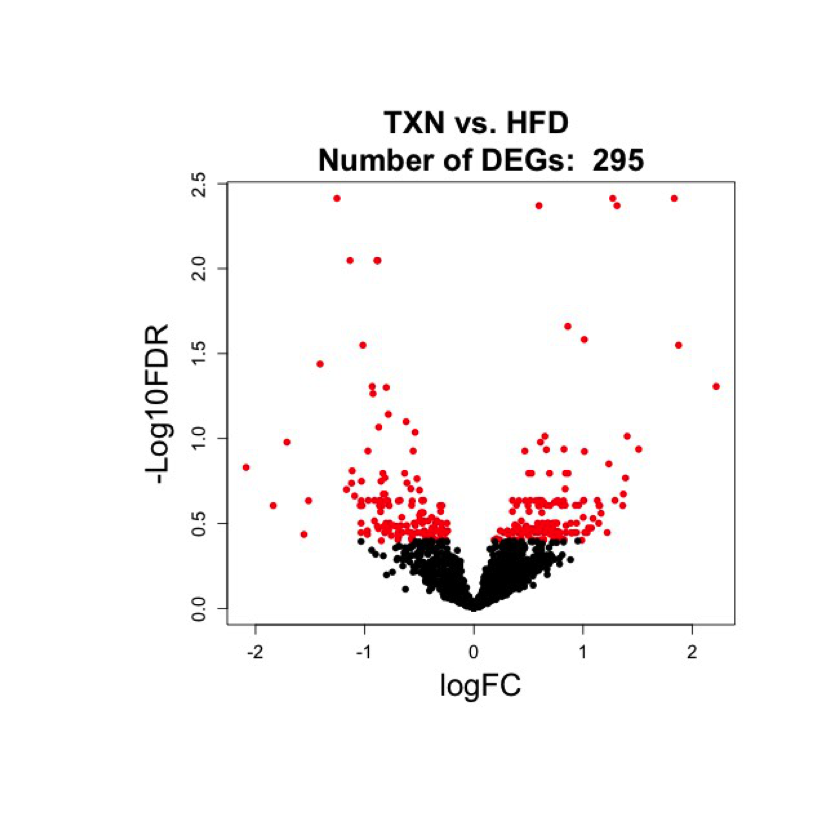

In [44]:
fig <- plot(file, axes=FALSE)